Goal: exploring feature reduction on a Face Recognition Dataset

Face classification dataset: http://vis-www.cs.umass.edu/lfw/

- Images of well-known people
- http://scikit-learn.org/stable/modules/generated/sklearn.datasets.fetch_lfw_people.html

In [1]:
import matplotlib.pyplot as plt

In [2]:
from sklearn.datasets import fetch_lfw_people

# downloads to ~/scikit_learn_data
lfw = fetch_lfw_people(min_faces_per_person=70, resize=0.4)

# introspect the images arrays to find the shapes (for plotting)
n_samples, height, width = lfw.images.shape

In [3]:
# our input data matrix, X
X = lfw.data

print('raw input shape', X.shape) # rows = n_samples, columns = n_features
print('n_samples', X.shape[0])
print('n_features', X.shape[1])

print('first 5 rows', X[:5])

raw input shape (1288, 1850)
n_samples 1288
n_features 1850
first 5 rows [[254.        254.        251.66667   ...  87.333336   88.666664
   86.666664 ]
 [ 39.666668   50.333332   47.        ... 117.666664  115.
  133.66667  ]
 [ 89.333336  104.        126.        ... 175.33333   183.33333
  183.       ]
 [ 16.666666    7.6666665   7.        ...  27.666666   38.
   51.333332 ]
 [122.666664  121.        126.666664  ...  22.         61.666668
   70.666664 ]]


In [4]:
y = lfw.target
print('first 5 targets', y[:5])

first 5 targets [5 6 3 1 0]


In [5]:
names = lfw.target_names
print('names', names)

names ['Ariel Sharon' 'Colin Powell' 'Donald Rumsfeld' 'George W Bush'
 'Gerhard Schroeder' 'Hugo Chavez' 'Tony Blair']


In [6]:
lfw.data[:5].shape # 5 images, flattened

(5, 1850)

In [7]:
lfw.images[:5].shape # 5 image, width x height

(5, 50, 37)

In [8]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=42)

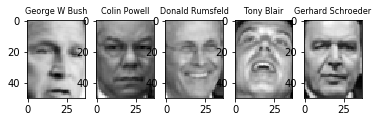

In [9]:
# plot first 5 training images
fig, axes = plt.subplots(nrows=1, ncols=5)

axes = axes.flatten()

# loop through all 3 collections at once (they must be the same shape)
for ax, X, y in zip(axes, X_train[:5], y_train[:5]):
    ax.imshow(X.reshape(height, width), cmap=plt.cm.gray)
    ax.set_title(lfw.target_names[y], size=8)

plt.show()

In [10]:
from sklearn.decomposition import PCA

# Compute a PCA (eigenfaces) on the face dataset (treated as unlabeled
# dataset): unsupervised feature extraction / dimensionality reduction
n_dims = 100

pca = PCA(n_components=n_dims)

# PCA extracts the eigenvalues that map from higher dimension to lower dimension
pca.fit(X_train)

# eigenvectors
eigenfaces = pca.components_.reshape((n_dims, height, width))

X_train_pca = pca.transform(X_train)
X_test_pca = pca.transform(X_test)

print('mapping shape', eigenfaces.shape)
print('train PCA shape', X_train_pca.shape)
print('test PCA shape', X_test_pca.shape)

mapping shape (100, 50, 37)
train PCA shape (966, 100)
test PCA shape (322, 100)


In [11]:
# https://github.com/scikit-learn/scikit-learn/blob/f0ab589f/sklearn/decomposition/pca.py#L107

# eigenvalues
pca.explained_variance_ 

array([501419.25  , 391794.7   , 183593.    , 154256.98  , 133670.53  ,
        74828.6   ,  65169.9   ,  56409.133 ,  52337.85  ,  49298.773 ,
        43599.195 ,  40965.574 ,  31706.832 ,  28196.91  ,  27588.219 ,
        25390.426 ,  23128.97  ,  22155.639 ,  21659.754 ,  18729.104 ,
        18053.51  ,  16946.492 ,  16575.906 ,  14548.057 ,  13765.099 ,
        13481.17  ,  13152.371 ,  12549.607 ,  11496.804 ,  10829.207 ,
        10203.9375,   9893.554 ,   9228.295 ,   9102.335 ,   8670.93  ,
         8551.058 ,   8154.386 ,   7677.283 ,   7519.661 ,   7379.3237,
         7257.0645,   6934.4136,   6736.026 ,   6697.124 ,   6243.987 ,
         6194.1543,   6101.1006,   5768.9473,   5637.2397,   5612.84  ,
         5418.22  ,   5323.884 ,   5194.0693,   5115.878 ,   5023.231 ,
         4892.031 ,   4668.673 ,   4636.2915,   4530.3384,   4484.519 ,
         4292.5566,   4222.197 ,   4077.6697,   3975.274 ,   3883.381 ,
         3813.6443,   3728.1624,   3675.4167,   3613.7651,   357

In [12]:
len(pca.explained_variance_)

100

In [13]:
import numpy as np
np.sum(pca.explained_variance_ratio_)

0.928317

In [14]:
# example application
evrs = []
dimensions = range(50, 250, 10)

for n in dimensions:
    pca_temp = PCA(n_components=n)
    pca_temp.fit(X_train)
        
    evr = np.sum(pca_temp.explained_variance_ratio_)
    print(n, evr)
    evrs.append(evr)

50 0.86302364
60 0.88197035
70 0.8969905
80 0.9093723
90 0.9199074
100 0.9283314
110 0.935816
120 0.9420798
130 0.9475996
140 0.95238745
150 0.9567349
160 0.960521
170 0.96389264
180 0.9669711
190 0.96971375
200 0.9721893
210 0.9744208
220 0.9764791
230 0.9782998
240 0.9799754


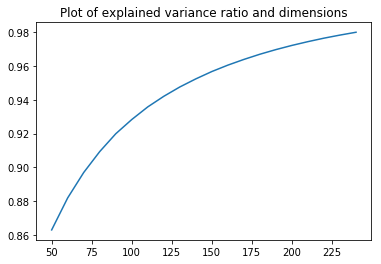

In [15]:
fig, ax = plt.subplots()
ax.plot(dimensions, evrs)
ax.set_title('Plot of explained variance ratio and dimensions')
plt.show()

In [16]:
# The singular values are equal to the 2-norms of the "n_components"
# variables in the lower-dimensional space.
pca.singular_values_

array([21997.035 , 19444.328 , 13310.419 , 12200.737 , 11357.467 ,
        8497.623 ,  7930.2554,  7377.995 ,  7106.7593,  6897.3413,
        6486.3877,  6287.43  ,  5531.464 ,  5216.3223,  5159.7124,
        4949.9253,  4724.347 ,  4623.872 ,  4571.8335,  4251.3037,
        4173.9233,  4043.9294,  3999.4688,  3746.8486,  3644.629 ,
        3606.8447,  3562.5886,  3479.9958,  3330.8281,  3232.6746,
        3137.9612,  3089.8672,  2984.1758,  2963.7397,  2892.654 ,
        2872.5896,  2805.1707,  2721.8704,  2693.7842,  2668.529 ,
        2646.3308,  2586.8337,  2549.5618,  2542.189 ,  2454.6787,
        2444.8638,  2426.43  ,  2359.4563,  2332.3672,  2327.314 ,
        2286.6094,  2266.616 ,  2238.8115,  2221.896 ,  2201.6853,
        2172.7424,  2122.562 ,  2115.1882,  2090.8794,  2080.279 ,
        2035.2683,  2018.5193,  1983.6711,  1958.6064,  1935.8364,
        1918.3761,  1896.7543,  1883.289 ,  1867.4269,  1858.259 ,
        1829.4965,  1823.7573,  1793.8645,  1769.1052,  1758.3

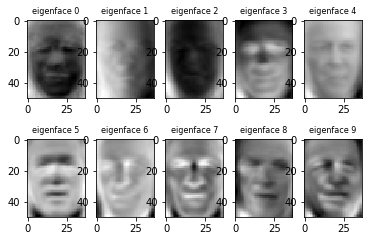

In [17]:
%matplotlib inline

# plot first 10 eigenfaces
n_rows = 2
n_cols = 5
n_total = n_rows * n_cols

fig, axes = plt.subplots(nrows=n_rows, ncols=n_cols)

axes = axes.flatten()

for ax, eigenface, i in zip(axes, eigenfaces[:n_total], range(n_total)):
    ax.imshow(eigenface, cmap=plt.cm.gray)
    ax.set_title('eigenface %d' % i, size=8)

plt.show()

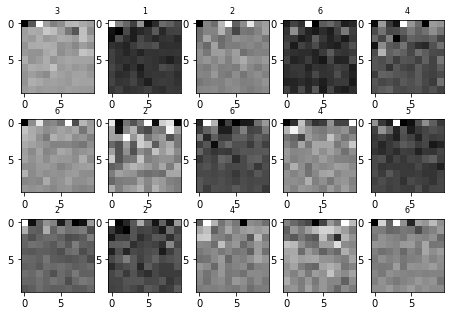

In [18]:
# plot the first 15 reduced features (note: not real faces)

n_rows = 3
n_cols = 5
n_total = n_cols * n_rows

fig, axes = plt.subplots(nrows=n_rows, ncols=n_cols)
plt.subplots_adjust(bottom=.01, left=.01, right=.99, top=.99)

axes = axes.flatten()

for ax, X_train_value, y_value in zip(axes, X_train_pca[:n_total], y_train):
    ax.imshow(X_train_value.reshape(10, 10), cmap=plt.cm.gray)
    ax.set_title(y_value, size=8)

plt.show()

In [19]:
# train a classifier using X_train_pca, y_train
#
# http://scikit-learn.org/stable/auto_examples/applications/plot_face_recognition.html

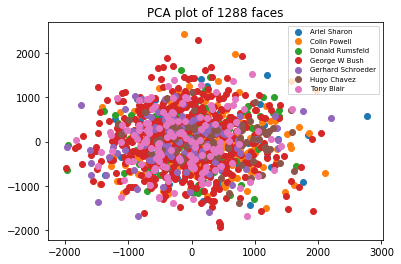

In [24]:
n_subset = len(lfw.target)

X_plot = lfw.data[:n_subset]
y_plot = lfw.target[:n_subset]

pca_plot = PCA(n_components=2)

Z_plot_2d = pca_plot.fit_transform(X_plot)

fig, ax = plt.subplots()

ax.set_title('PCA plot of %d faces' % n_subset)

n_labels = len(lfw.target_names)a
for i in range(n_labels):
    ax.scatter(Z_plot_2d[y_plot==i, 0],
               Z_plot_2d[y_plot==i, 1],
               label=lfw.target_names[i])
ax.legend(fontsize='x-small')
plt.show()

<IPython.core.display.Javascript object>


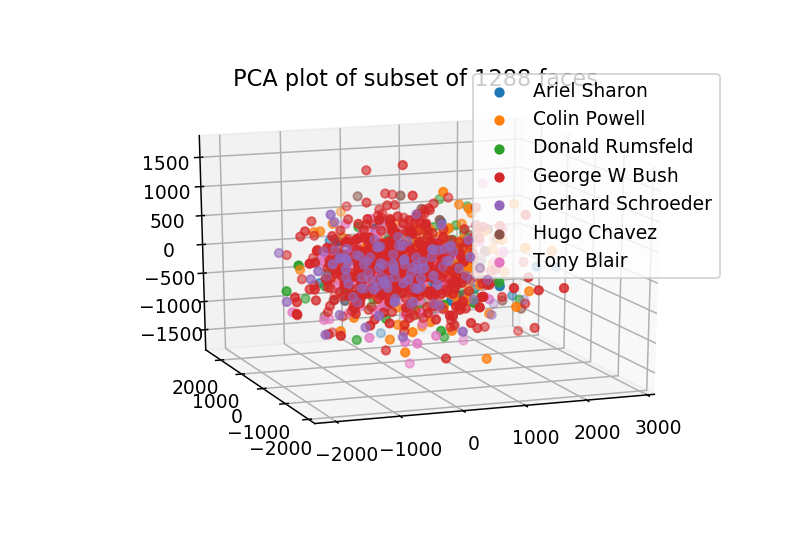

In [26]:
%matplotlib notebook

# https://matplotlib.org/mpl_toolkits/mplot3d/tutorial.html
from mpl_toolkits.mplot3d import Axes3D

pca_plot = PCA(n_components=3)

Z_plot_3d = pca_plot.fit_transform(X_plot)

fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')

ax.set_title('PCA plot of subset of %d faces' % n_subset)

n_labels = len(lfw.target_names)
for i in range(n_labels):
    ax.scatter(Z_plot_3d[y_plot==i, 0],
               Z_plot_3d[y_plot==i, 1],
               Z_plot_3d[y_plot==i, 2],
               label=lfw.target_names[i])
ax.legend()
plt.show()

<IPython.core.display.Javascript object>


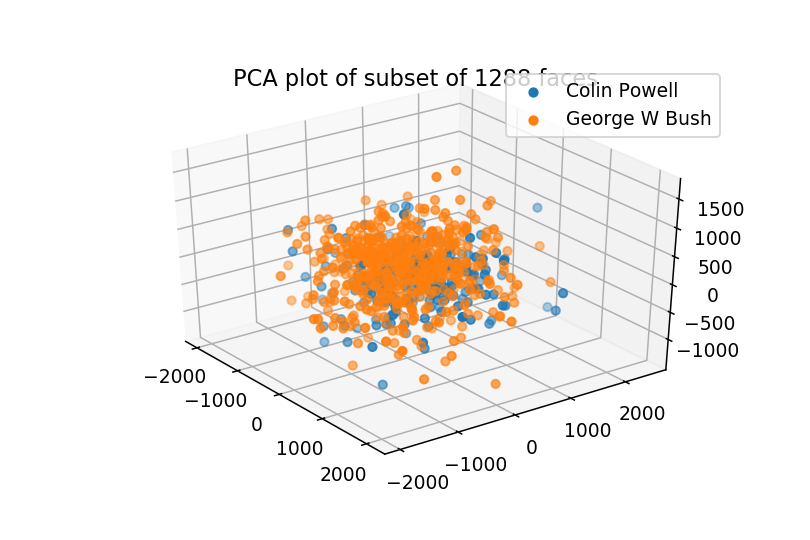

In [31]:
%matplotlib notebook

pca_plot = PCA(n_components=3)

Z_plot_3d = pca_plot.fit_transform(X_plot)

fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')

ax.set_title('PCA plot of subset of %d faces' % n_subset)

subset_labels = [1, 3]
for i in subset_labels:
    ax.scatter(Z_plot_3d[y_plot==i, 0],
               Z_plot_3d[y_plot==i, 1],
               Z_plot_3d[y_plot==i, 2],
               label=lfw.target_names[i])
ax.legend()
plt.show()

In [29]:
lfw.target_names

array(['Ariel Sharon', 'Colin Powell', 'Donald Rumsfeld', 'George W Bush',
       'Gerhard Schroeder', 'Hugo Chavez', 'Tony Blair'], dtype='<U17')

'Colin Powell'

In [76]:
%matplotlib inline
from sklearn.manifold import TSNE

tsne = TSNE(n_components=2)

X_plot_2d_tsne = tsne.fit_transform(X_plot)

ax.set_title('T-SNE plot of subset')

n_labels = 3
for i in range(n_labels):
    ax.scatter(X_plot_2d_tsne[y_plot==i, 0],
               X_plot_2d_tsne[y_plot==i, 1],
               label=lfw.target_names[i])
ax.legend()
plt.show()

PCA theory

https://www.cs.princeton.edu/picasso/mats/PCA-Tutorial-Intuition_jp.pdf

PCA example

http://www.sthda.com/english/articles/31-principal-component-methods-in-r-practical-guide/112-pca-principal-component-analysis-essentials/

In [130]:
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis

lda_evrs = []
dimensions = range(0, 10, 1)

for n in dimensions:
    lda_temp = LinearDiscriminantAnalysis(n_components=n)
    lda_temp.fit(X_train, y_train)
        
    evr = np.sum(lda_temp.explained_variance_ratio_)
    print(n, evr)
    lda_evrs.append(evr)

C:\Users\issohl\AppData\Local\Continuum\miniconda3\envs\mldds01\lib\site-packages\sklearn\discriminant_analysis.py:388: UserWarning: Variables are collinear.
  warnings.warn("Variables are collinear.")


0 0.0
1 0.24424702327795456
2 0.4591387985880531
3 0.6363916815027626
4 0.7848201520369485
5 0.9193821617879437
6 1.0000000000000002
7 1.0000000000000002
8 1.0000000000000002
9 1.0000000000000002
